# Week 2 tutorial: Logistic regression

### Introduction
In this exercise, you will implement logistic regression and get to see it work on data. After implementing a simple case, we will see how to repeat our work using scikit-learn, then work on more complex cases that require feature mapping and regularization. Hopefully you have watched the video lectures associated with this week. **Please keep the function declarations as they are.**

To get started with this exercise, you will need to download the Week 2 folder from the github or dropbox.
<br>
**Warning: Due to Phil's laziness, the varible names in this sheet get reused across sections. Everything will work from top to bototm; however, if you are having trouble, try restarting your kernel, and running the notebook from the top. **

### External files included for this exercise
 - $\texttt{ex2data1.txt}$ - Dataset for linear regression with one variable
 - $\texttt{ex2data2.txt}$ - Dataset for linear regression with multiple variables


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1 - Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. This outline and the framework code in this notebook will guide you through the exercise.

### 1.1 - Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible. This next cell will load the data and display it on a 2-d plot. The plotting function will display a figure where the axes are the two exam scores, and the positive and negative admission examples are shown with different markers. <br>
**Optional exercise:** Take a few moments to change the arguments in the function calls to `plot(...)` to ensure you understand what they each do. 

In [2]:
data = np.loadtxt('../data/ex2data1.txt',delimiter=',')
X = data[:,0:2] 
m = X.shape[0]
one = np.ones((m,1))
X = np.concatenate([one,X],axis=1)
y = data[:,-1].reshape((m,1))
# A fun lil list comprehension to get the relevant row indexs for each case
pos = [idx for (idx,val) in enumerate(y) if val==1]
neg = [idx for (idx,val) in enumerate(y) if val==0]

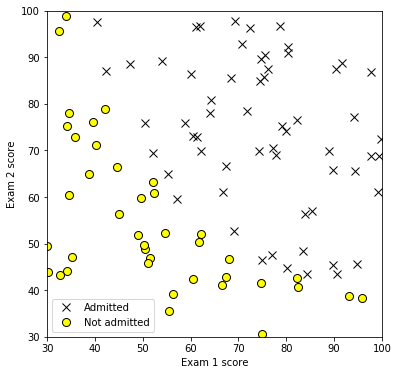

In [3]:
fig = plt.figure(figsize=(6,6))
plt.plot(X[pos,1],X[pos,2],'kx',MarkerSize=8,label='Admitted')
plt.plot(X[neg,1],X[neg,2],'ko',MarkerFaceColor='yellow',MarkerSize=8,label='Not admitted')
plt.xlim([30,100])
plt.ylim([30,100])
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

### 1.2 - Implementation
#### 1.2.1 - Sigmoid function
Before we start with the actual cost function, let's recall that the logistic regression hypothesis is defined as:
\begin{equation*}
h_\theta = g(x\theta)
\end{equation*}
where $g(z)$ is the sigmoid function, 
\begin{equation*}
g(z) = \frac{1}{1+\mathrm{e}^{-z}}
\end{equation*}
$\theta$ is a (n,1) matrix, and $x$ is a single example (1,n).
<br>
Your first step is to implement the sigmoid function below. When you are finished, try testing a few values by calling `sigmoid(x)`. For large values of $x$, the sigmoid should be close to 1, while for large negative values, the sigmoid should be clost to 0. Evaluating `sigmoid(0)` should give exactly 0.5. 
<br>
**Exercise: Finish the function below, such that it will calculate the sigmoid value elementwise for vectors and matricies **

In [4]:
def sigmoid(x):
    '''
    Computes the sigmoid function elementwise
    
    Input
    ==============
    x : scalar, vector or martrix of values
    
    Returns
    ==============
    g : elementwise sigmoid function. Same shape as x.
    '''
    ### START CODE HERE
    g=1/(1+np.exp(-x))
    ### END CODE HERE ###
    return g

print(sigmoid(0))

0.5


#### 1.2.2 - Cost function and gradient
Similar to what we did with linear regression, we will now implement the cost function and gradient for logistic regression. Recall that the cost function for logistic regression is the cross entropy
\begin{equation}
J(\theta) = \frac{1}{m}\sum^m_{i=1} \left[
-y^{(i)} \log(h_\theta(x^{(i)})) - (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))
\right]
\end{equation}
and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{\mathrm{th}}$ element (for $j=-,1\dots,n$) is defined as follows:
\begin{equation}
\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m} \sum^m_{i=1} (h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
\end{equation}

Here the sums are operating down the $X$ matrix across all trainging examples, and the $j$ refers to particular columns of *features*. Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$. 

**Exercise: Implement the function `compute_cost()` to return both the loss function J, and the gradient.**
<br>
*Hint: A vectorized way of calculating the sum of the elements of a product is an inner product. *

In [5]:
def compute_cost(theta,X,y):
    '''
    Computs the cost of using theta as the parameters for logistic regression
    and the gradient of the cost with respect ot the parameters. 
    
    Input
    ==============
    theta : (n,1) vector of parameters
    X : (m,n) matrix of training data
    y : (m,1) vector of ground truth data
    
    Returns
    ==============
    J : cost
    grad : (n,1) vector of gradients
    '''
    
    # Initialize useful parameters
    m = X. shape[0]
    # You will need to return the following correctly
    J = 0
    grad = np.zeros(theta.shape)
    
    ### START CODE HERE ###
    J = 1/m * (np.dot(-y.T, np.log(sigmoid(np.dot(X,theta)))) -
                np.dot((1-y).T,np.log(1-sigmoid(np.dot(X,theta)))))
    grad = 1/m * np.dot(X.T,(sigmoid(np.dot(X,theta))-y))
    ### END CODE HERE ###
    
    return J,grad

In [6]:
theta=np.zeros((X.shape[1],1))
J,grad = compute_cost(theta,X,y)
print("Initial cost = {:6.4f}".format(J[0,0]))
print("Initial gradiaent =\n",grad)

Initial cost = 0.6931
Initial gradiaent =
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


**Expected output:**<br>
`Initial cost = 0.6931
 Initial gradiaent =
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]`

#### 1.2.3 - Gradient descent

We can implement the gradient descent algorithm exactly as we did in Linear regression. Below however, the cost computation includes the gradient calculation, so the update of theta is much simpler. 

I've left a cell after the gradient descent cell to show how the loss changes over time, and replot the data with your derived linear decision boundary. 

In [7]:
def gradient_descent(X,y,theta,alpha=0.00001,num_iters=1500):
    '''
    Performs gradient descent to learn theta
    
    Inputs
    ===============
    X: input features
    y: desired ouput values
    alpha: learning rrate
    num_iters: number of iteratons for learning
    
    Returns
    ===============
    theta: final learned weights
    J_history: list of loss over each itteration
    '''
    m = y.shape[0] #Number of training examples
    J_history = []
    
    for i in range(num_iters):
        # Calculate cost and gradient
        J, grad = compute_cost(theta,X,y)
        J_history.append(J[0,0])
        # Update theta
        theta = theta - alpha * grad

    return theta, J_history

initial_theta=np.array([[-13],[0.2],[0.2]])
num_iters=1500
learned_theta, J_hist = gradient_descent(X,y,initial_theta,num_iters=num_iters)

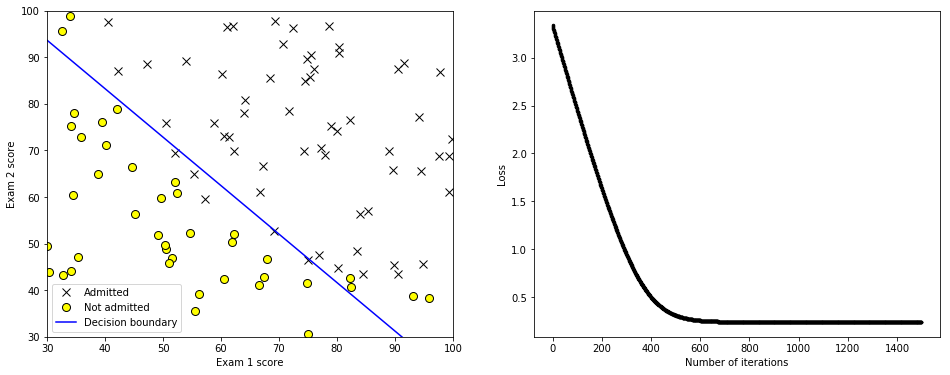

In [8]:
# Finding decision boundary (this uses an analytical function derived from the 0.5 condition)
plot_x = [np.min(X[:,1]),np.max(X[:,1])]
plot_y = [-1/learned_theta[2,0]*(learned_theta[1,0]*x + learned_theta[0,0]) for x in plot_x]
                
fig1=plt.figure(figsize=(16,6))
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(X[pos,1],X[pos,2],'kx',MarkerSize=8,label='Admitted')
ax1.plot(X[neg,1],X[neg,2],'ko',MarkerFaceColor='yellow',MarkerSize=8,label='Not admitted')
ax1.plot(plot_x,plot_y,'b-',label='Decision boundary')
ax1.legend()
ax1.set_xlim([30,100])
ax1.set_ylim([30,100])
ax1.set_xlabel('Exam 1 score')
ax1.set_ylabel('Exam 2 score')

ax2 = fig1.add_subplot(1,2,2)
ax2.plot([a for a in range(1500)], J_hist,'k.',MarkerSize=5)
ax2.set_xlabel("Number of iterations")
ax2.set_ylabel("Loss")

plt.show()

#### 1.2.4 - Evaluating your function
After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of **?**.
Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector $\theta$. Then there is a script below to calculate the training accuracy of your model. 
<br>
**Exercise: Comlete the function `predict()` below, to make a predicted y value of 0 or 1.**<br>
*Hint: use the round function or a logical statement (int(True)=1, int(False)=0).*

In [9]:
def predict(theta,X):
    '''
    Makes a prediction using a learned set of values for theta.
    
    Inputs
    ===============
    theta : (n,1) vector of parameters
    X : (m,n) matrix of training data
    
    Returns
    ===============
    p: (m,1) vector of calclated prediction values
    '''
    m = X. shape[0]
    
    ### START CODE HERE ###
    p = sigmoid(np.dot(X,theta))
    p = p>=0.5
    p = p.astype(float)
    ### END CODE HERE ###
    return p

p = predict(learned_theta,X)
acc = np.mean(p==y)*100
print("Training accuracy: " ,acc)
print("Expected accuracy (approx): 89.0")

Training accuracy:  89.0
Expected accuracy (approx): 89.0


#### 1.2.5 - Blackbox
Excellent work! Now lets take a look at the sklearn implementation. First we'll reimport our data with the intercept column, and use the scikitlearn version of logistic regression on our exam data. 
Calling `linear_model.LogisticRegression()` will return a class, that can be used to fit to our X,y data.

The methods and attributes of this model class are listed here:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In breif:
- First we initialize the class
- Second we call the .fit() method on the data
- The prediction and scoring is also taken care of in the available methods

In [10]:
from sklearn.linear_model import LogisticRegression
# Load data: Notice how the shape of y is now (m,) not (m,1)
data = np.loadtxt('../data/ex2data1.txt',delimiter=',')
X = data[:,0:2] 
m = X.shape[0]
one = np.ones((m,1))
X = np.concatenate([one,X],axis=1)
m = X.shape[0]
y = data[:,-1]
# Execute regression
log_reg = LogisticRegression()
log_reg.fit(X,y)
print("Training accuracy: ",log_reg.score(X,y))
print("Even better than before!")

Training accuracy:  0.91
Even better than before!


Here is a bit of complicated graphworks. While before we plotted a decision boundary at P=0.5, this shows a contour plot of the probability of admisison given a set of scores. Overlayed are the points colored according to their binary ground truth. The decision boundary is given by the P=0.5 line in green.

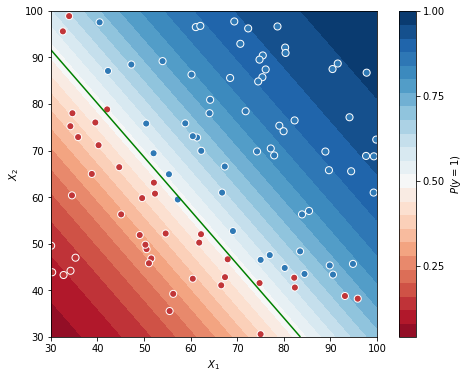

In [11]:
xx, yy = np.mgrid[30:100:0.1, 30:100:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]
one = np.ones((grid.shape[0],1))
grid=np.concatenate((one,grid),axis=1)
probs = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.contour(xx, yy, probs, levels=[0.5],vmin=0, vmax=1,colors='green')
ax.scatter(X[:,1], X[:, 2], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(30, 100), ylim=(30, 100),
       xlabel="$X_1$", ylabel="$X_2$")
plt.show()

## 2 - Regularized logistic regression
In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### 2.1 - Visualizing the data
**The following import and visualization does not include a first column of ones as an intercept term.**<br>
Examining the data using an adaptation of the plotting function from above, this shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

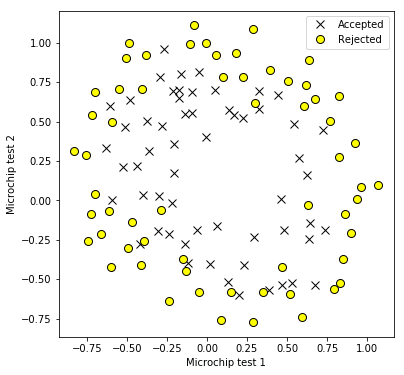

In [12]:
data = np.loadtxt('../data/ex2data2.txt',delimiter=',')
X1 = data[:,0]
X2 = data[:,1]
m = X1.shape[0]
y = data[:,-1]
# A fun lil list comprehension to get the relevant row indexs for each case
pos = [idx for (idx,val) in enumerate(y) if val==1]
neg = [idx for (idx,val) in enumerate(y) if val==0]
fig = plt.figure(figsize=(6,6))
plt.plot(X1[pos],X2[pos],'kx',MarkerSize=8,label='Accepted')
plt.plot(X1[neg],X2[neg],'ko',MarkerFaceColor='yellow',MarkerSize=8,label='Rejected')
plt.xlabel("Microchip test 1")
plt.ylabel("Microchip test 2")
plt.legend()
plt.show()

### 2.2 - Feature mapping
One way to fit the data better is to create more features from each datapoint. In the below function `map_feature()`, we can map the features into all polynomial terms of $x_1$ and $x_2$ up to the $n^\mathrm{th}$ power (we'll use $n=6$).
\begin{equation}
\mathrm{map\_feature}(x) = \begin{bmatrix}
x_1\\
x_2\\
x_1^2\\
x_1x_2\\
x_2^2 \\
x_1^3\\
\vdots\\
x_1x_2^5\\
x_2^6\\
\end{bmatrix}
\end{equation}
As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 27-dimensional vector.  A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot. *Note that we've excluded the 0$^{th}$ order term, as this intercept will come in separately.*<br>



While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [13]:
def map_feature(X1,X2,degree=6):
    '''
    Returns a matrix of feature vectors of the nth degree polynomial terms
    of two variables. Does not include constant intercept term. 
    
    Inputs
    ===============
    X1 : (m,1) vector of feature 1
    X2 : (m,1) vector of feature 2
    degree : degree of polynomial features
    
    Returns
    ===============
    out: (m,n) new matrix of training data
    '''
    new_size = (degree+2)*(degree+1) //2-1
    out = np.zeros((X1.shape[0],new_size))
    idx=0
    for i in range(1,degree+1):
        for j in range(0,i+1):
            out[:,idx] = X1**(i-j) * X2**j
            idx+=1
    return out
X = map_feature(X1,X2)

### 2.3 - Cost function and gradient
**Regularization** introduces a penalty term for specific weights becoming too large. This effectively reduces the learning algorithm's ability to over-fit a function, and favors a smooth decision boundary. Below, I will reiterate the functional form of the loss and gradient; however, we will opt for convenience and use scikit-learn for implementation. 

The regularized cost funciton in logistic regression is the cross-entropy loss with an added term:
\begin{equation}
J(\theta) = \frac{1}{m}\sum^m_{i=1} \left[
-y^{(i)} \log(h_\theta(x^{(i)})) - (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))
\right]
+ \frac{\lambda}{2m} \sum^n_{j=1}\theta_j^2
\end{equation}
We do not regularize the intercept term, which is why it was excluded from our implementation of `map_feature()`. The gradient of the cost function is a vector where the $j^{\mathrm{th}}$ element is defined as:
\begin{equation}
\frac{\partial J(\theta)}{\partial\theta_j} = \left(\frac{1}{m} \sum^m_{i=1} (h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j\right) + \frac{\lambda}{2m}\theta_j
\end{equation}

#### 2.3.1 - Implementation with sklearn
You should feel confident that you could program this gradient descent on logistic regression with regularization. For the sake of breivity, we will use a handy machine learning library to do this for us. <br>
**Excercise :**
- Following along from the Exam Scores example, create a call to the class `LogistiRegression()`.
- In the initializer, specify the arguments `fit_intercept=True`, `C=1`. C is the inverse of $\lambda$: smaller values specify stronger regularization.
    - A sensible line would look something like `log_reg = LogisticRegression(fit_intercept=True, C=1)
- Next call the `.fit()` method on our variables `X` and `y`. 
- Print the training accuracy using the `.score()` method.

In [14]:
### START CODE HERE ###
log_reg = LogisticRegression(fit_intercept=True, C=1)
log_reg.fit(X,y)
print("Training accuracy: ",log_reg.score(X,y))
### END CODE HERE ###

Training accuracy:  0.8220338983050848


### 2.4 - Understanding our results. 
Below, I've given you another cell that creates a lovely graph to examine the results of our algorithm. 
<br>
*Remember, all the machine learns is a function of probability with resepct to our high dimensional input. Anything with a probability less than 0.5 is a 'negative' example, and above such is a positive example.* <br>
**Exercise: Lets have a play with regularization.** The implementation of regularization in `sklearn.linear_model.LogisticRegression` uses a value of `C` that is the inverse of `lambda` in our equations above. Run the above and below cells with the following values for `C`:
- C = 1 | $\lambda$ = 1 : Appropriate regularization
- C = 0.01 | $\lambda$ = 100 : Too much regularization, *i.e.* poor fit. 
- C = 1e5 | $\lambda$ = 1e-5 : No regularization,  *i.e.* overfitting. 

Explore different values of regularization. In practice, we would train only on a portion of our data, and use a second portion to test the predicability of our model. Models that are overfit may have a high accuracy; however, they have limited predictive capacity and are thus useless. 

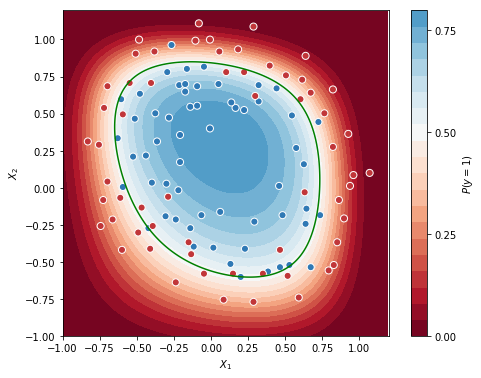

In [15]:
xx, yy = np.mgrid[-1:1.2:0.01, -1:1.2:0.01]
grid = map_feature(xx.ravel(), yy.ravel())

probs = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.contour(xx, yy, probs, levels=[0.5],vmin=0, vmax=1,colors='green')

ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-1, 1.2), ylim=(-1, 1.2),
       xlabel="$X_1$", ylabel="$X_2$")
plt.show()